In [1]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()


Saving CHL5230-F23-Datathon #1-Dataset1.csv to CHL5230-F23-Datathon #1-Dataset1.csv


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

df = pd.read_csv(io.BytesIO(uploaded['CHL5230-F23-Datathon #1-Dataset1.csv']))


In [18]:
#Display the first few rows of the dataset to ensure it's loaded correctly
print(df.head())
print(df.shape)
print(df.describe())
print(df.isnull().sum()) #No missing data

   Age  Gender  Calorie_Intake  Sugar_Intake  Physical_Activity  \
0   56  Female            3091            90                160   
1   69  Female            2090           106                 27   
2   46    Male            2938            11                 45   
3   32  Female            3022            48                112   
4   60  Female            2350            83                115   

   Fast_Food_Frequency  Screen_Time    Height     Weight        BMI  
0                    4            1  1.569070  81.199394  32.981343  
1                    0            9  1.629449  74.273566  27.973877  
2                    2            3  1.637726  71.453466  26.640417  
3                    1            8  1.514198  98.163045  42.813720  
4                    0            7  1.410559  57.323914  28.810685  
(23535, 10)
                Age  Calorie_Intake  Sugar_Intake  Physical_Activity  \
count  23535.000000    23535.000000  23535.000000       23535.000000   
mean      48.532993  

In [28]:
df['Gender'] = df['Gender'].replace({'Male':0, 'Female':1})

conditions = [
    df['BMI'] < 18.5,
    (df['BMI'] >= 18.5) & (df['BMI'] < 25),
    (df['BMI'] >= 25) & (df['BMI'] < 30),
    (df['BMI'] >= 30)
]

labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']

# Use np.select to apply conditions and assign labels
df['BMI_category'] = np.select(conditions, labels, default='Undefined')

print(df.head())

   Age  Gender  Calorie_Intake  Sugar_Intake  Physical_Activity  \
0   56       1            3091            90                160   
1   69       1            2090           106                 27   
2   46       0            2938            11                 45   
3   32       1            3022            48                112   
4   60       1            2350            83                115   

   Fast_Food_Frequency  Screen_Time    Height     Weight        BMI  \
0                    4            1  1.569070  81.199394  32.981343   
1                    0            9  1.629449  74.273566  27.973877   
2                    2            3  1.637726  71.453466  26.640417   
3                    1            8  1.514198  98.163045  42.813720   
4                    0            7  1.410559  57.323914  28.810685   

  BMI_category  
0        Obese  
1   Overweight  
2   Overweight  
3        Obese  
4   Overweight  


In [33]:
X = df[['Age', 'Gender']]
y = df['BMI_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=28)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1379  498  336  107]
 [1068  430  293   87]
 [1200  410  309   73]
 [ 513  184  142   32]]
               precision    recall  f1-score   support

Normal Weight       0.33      0.59      0.43      2320
        Obese       0.28      0.23      0.25      1878
   Overweight       0.29      0.16      0.20      1992
  Underweight       0.11      0.04      0.05       871

     accuracy                           0.30      7061
    macro avg       0.25      0.25      0.23      7061
 weighted avg       0.28      0.30      0.27      7061



In [34]:
X = df[['Age', 'Gender', 'Physical_Activity']]
y = df['BMI_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=28)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1292  524  402  102]
 [1003  432  365   78]
 [1116  425  364   87]
 [ 499  206  141   25]]
               precision    recall  f1-score   support

Normal Weight       0.33      0.56      0.41      2320
        Obese       0.27      0.23      0.25      1878
   Overweight       0.29      0.18      0.22      1992
  Underweight       0.09      0.03      0.04       871

     accuracy                           0.30      7061
    macro avg       0.24      0.25      0.23      7061
 weighted avg       0.27      0.30      0.27      7061



In [43]:
X = df[['Age', 'Gender', 'Physical_Activity', 'Sugar_Intake', 'Fast_Food_Frequency', 'Physical_Activity']]
y = df['BMI_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=28)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1294  538  383  105]
 [1028  450  337   63]
 [1081  456  364   91]
 [ 480  200  154   37]]
               precision    recall  f1-score   support

Normal Weight       0.33      0.56      0.42      2320
        Obese       0.27      0.24      0.26      1878
   Overweight       0.29      0.18      0.23      1992
  Underweight       0.12      0.04      0.06       871

     accuracy                           0.30      7061
    macro avg       0.26      0.26      0.24      7061
 weighted avg       0.28      0.30      0.28      7061



In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

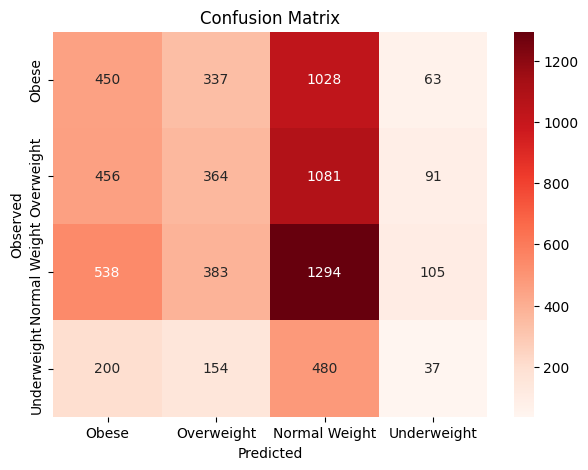

In [45]:
classes = df['BMI_category'].unique()

plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap="Reds", annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('Confusion Matrix')
plt.show()